In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import ascii

from matplotlib.gridspec import GridSpec

%matplotlib inline

In [2]:
from maxi import MaxiData

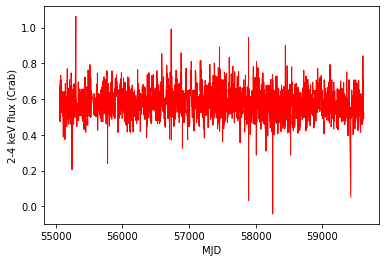

In [3]:
TARGET = "GX13+1"
maxi_data = MaxiData("data/{}_lc_1day_all.dat".format(TARGET))

#ax = plt.subplot(111)
#maxi_data.plot(ax, 'total', color='b', lw=1, alpha=0.5)

maxi_data.calibrate(thresh=5.0)
ax = plt.subplot(111)
maxi_data.plot(ax, 'soft', color='r', lw=1)

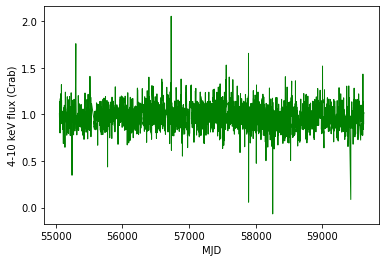

In [4]:
ax = plt.subplot(111)
maxi_data.plot(ax, 'med', color='g', lw=1)

In [5]:
np.std(maxi_data.soft) / np.mean(maxi_data.soft)

0.1237407360274814

In [6]:
np.std(maxi_data.med) / np.mean(maxi_data.med)

0.12405624796028068

## What part of the Crab light curve am I ignoring with my threshold choice?

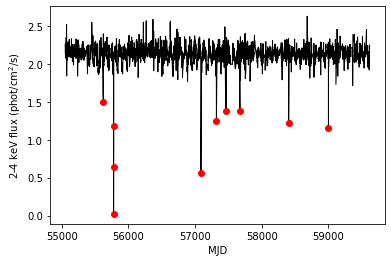

In [9]:
crab_data = MaxiData("data/Crab_lc_1day_all.dat")

thresh = 5.0
ibad = np.abs(crab_data.soft - np.median(crab_data.soft)) > (thresh * np.std(crab_data.soft))

ax = plt.subplot(111)
crab_data.plot(ax, 'soft', color='k', lw=1)
plt.plot(crab_data.mjd[ibad], crab_data.soft[ibad], 'o', color='r')

## 2-10 keV integrated

In [11]:
md2 = MaxiData("data/{}_lc_1day_all.dat".format(TARGET))
crab = MaxiData("data/Crab_lc_1day_all.dat")

md2_broad = md2.soft + md2.med
crab_broad = crab.soft + crab.med
crab_interp = np.interp(md2.mjd, crab.mjd, crab_broad)

(0.0, 0.6)

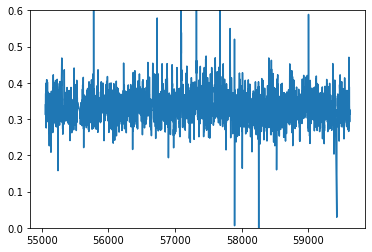

In [15]:
plt.plot(md2.mjd, md2_broad/crab_interp)
plt.ylim(0, 0.6)

**MAJOR NOTE:** My cflux calculation suggests 0.2 Crab (10^-8.3 / 2.4e-8 for the 2-10 keV range). This agrees with the paper Allen+ 2018, top of section 3.1.1, so I'm going with that number. Note also that Allen includes a pileup model and the majority of the pileup is in the > 4 keV range.